In [340]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import FinanceDataReader as fdr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
import pandas_ta as ta

warnings.filterwarnings('ignore')

In [341]:
with open("../btc_usd_1d.pkl", "rb") as f:
    df = pickle.load(f)
df.reset_index(inplace=True)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df.set_index('Date', inplace=True)

In [342]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2614 entries, 2014-11-29 to 2022-01-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2614 non-null   float64
 1   High    2614 non-null   float64
 2   Low     2614 non-null   float64
 3   Close   2614 non-null   float64
 4   Volume  2614 non-null   float64
dtypes: float64(5)
memory usage: 122.5 KB
None


In [343]:
# start_date = '20150104'
# end_date = '20211214'
# DJI_df = fdr.DataReader('dji', start_date, end_date).reset_index()
# DJI_df

# EXC = fdr.DataReader('USD/KRW', start_date, end_date).reset_index()
# EXC

#df.ta.log_return(cumulative=True, append=True)
#df.ta.percent_return(cumulative=True, append=True)
#df.columns

In [344]:
#df.ta.strategy("Momentum")

In [345]:
predict_df = df
predict_df['y_true'] = predict_df['Close'].shift(-1) # 위 함수와 같은 동작수행
predict_df = predict_df[:-1]
predict_df

,Open,High,Low,Close,Volume,y_true
Date,,,,,,
2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06,373.34
2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,378.39
2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,379.25
2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,376.67
2014-12-03,379.25,383.00,374.23,376.67,2.998358e+06,365.20
...,...,...,...,...,...,...
2022-01-19,42378.23,42589.90,41145.23,41683.21,1.664704e+03,40736.05
2022-01-20,41733.21,43518.69,40554.14,40736.05,2.425153e+03,36495.46
2022-01-21,40654.72,41115.58,35423.00,36495.46,6.201046e+03,35091.11


In [346]:
#결측치 처리
predict_df2 = predict_df.dropna(axis=1, how='all')
predict_df2 = predict_df2[40:]

predict_df3 = predict_df2.interpolate(method='values')
predict_df4 = predict_df3.dropna(axis=0, how='any')

In [347]:
col_dict = predict_df4.columns
col_dict

minmax_scaler = MinMaxScaler()
minmax_scaled_predict_df = minmax_scaler.fit_transform(predict_df4)
minmax_scaled_predict_df = pd.DataFrame(minmax_scaled_predict_df)
minmax_scaled_predict_df.columns = col_dict

In [348]:
minmax_scaled_predict_df

,Open,High,Low,Close,Volume,y_true
0,0.001704,0.000930,0.001882,0.001703,0.000000,0.001703
1,0.001704,0.000930,0.001882,0.001703,0.000000,0.001703
2,0.001704,0.000930,0.001882,0.001703,0.000000,0.001703
3,0.001704,0.000930,0.001882,0.001703,0.000000,0.001575
4,0.001609,0.000866,0.001681,0.001575,0.002763,0.000875
...,...,...,...,...,...,...
2568,0.626488,0.616061,0.620186,0.616069,0.000002,0.602016
2569,0.616916,0.629563,0.611244,0.602016,0.000003,0.539096
2570,0.600912,0.594628,0.533614,0.539096,0.000008,0.518259
2571,0.538475,0.532267,0.512085,0.518259,0.000006,0.536101


In [ ]:
minmax_scaled_predict_df

In [349]:
from sklearn.model_selection import train_test_split
data = minmax_scaled_predict_df[col_dict[:-1]]
target = minmax_scaled_predict_df['y_true']

In [350]:
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2, shuffle=False)

In [351]:
model = LinearRegression()
LR = model.fit(x_train, y_train)

In [352]:
y_pred = model.predict(x_valid)

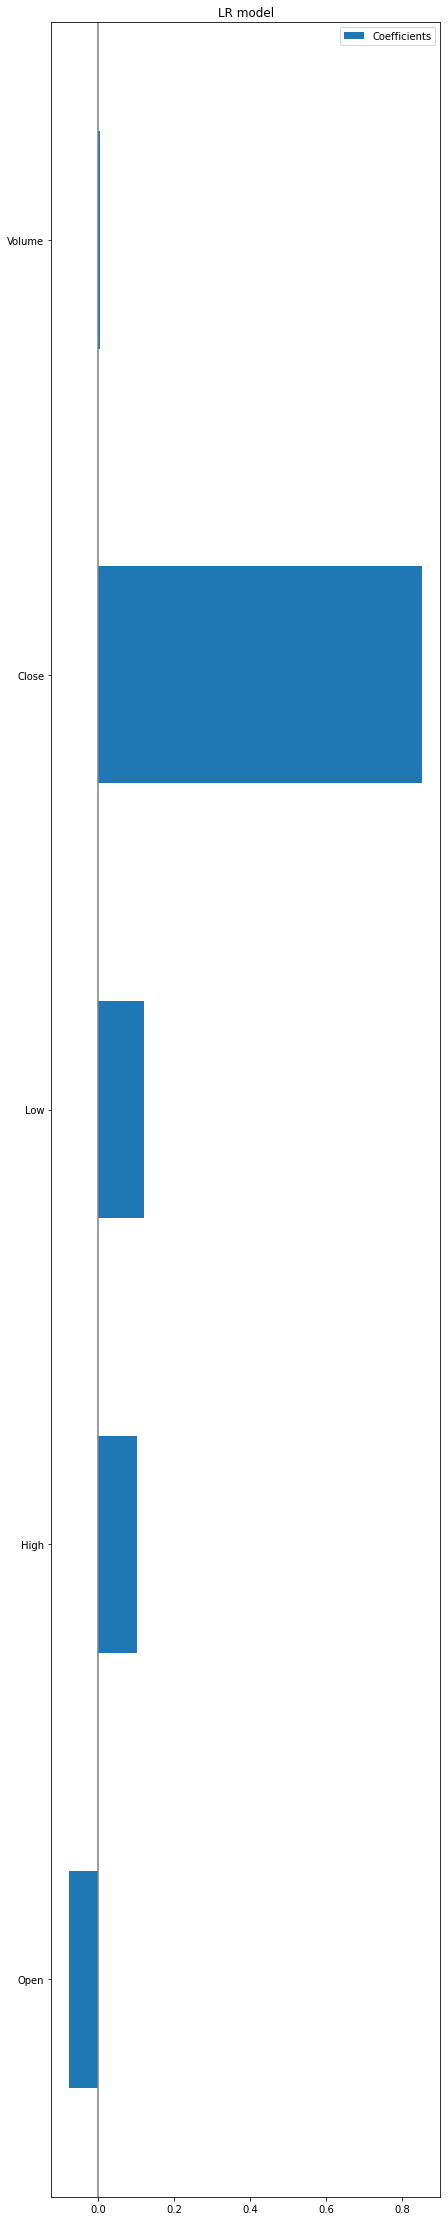

In [353]:
coefs = pd.DataFrame(
   model.coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 40))
plt.title('LR model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [354]:
y_pred

array([0.16549293, 0.16847183, 0.16772977, 0.17105981, 0.17040128,
       0.17418956, 0.16641783, 0.14850452, 0.15229598, 0.14807585,
       0.14954658, 0.1507979 , 0.14739797, 0.14921123, 0.15113434,
       0.15147414, 0.15228617, 0.15088825, 0.15566752, 0.15757441,
       0.1598995 , 0.15964006, 0.15964502, 0.16185398, 0.159354  ,
       0.15206318, 0.15369374, 0.14932192, 0.15659953, 0.15593919,
       0.15677169, 0.15723794, 0.15630006, 0.1581649 , 0.15725915,
       0.1550925 , 0.15422149, 0.15407708, 0.15576336, 0.15754118,
       0.15482053, 0.1557052 , 0.15925663, 0.16133295, 0.16531736,
       0.16626306, 0.16849383, 0.16694128, 0.16699867, 0.16808626,
       0.16539924, 0.16607546, 0.16831756, 0.17180096, 0.17432737,
       0.18744616, 0.19010857, 0.18919883, 0.19204393, 0.19107922,
       0.19111165, 0.19975733, 0.19418081, 0.19692157, 0.19818639,
       0.20242894, 0.20157201, 0.1982663 , 0.2050119 , 0.20669727,
       0.22811123, 0.22864566, 0.21722149, 0.22686182, 0.22457

In [355]:
y_valid = y_valid.reset_index(drop=True)

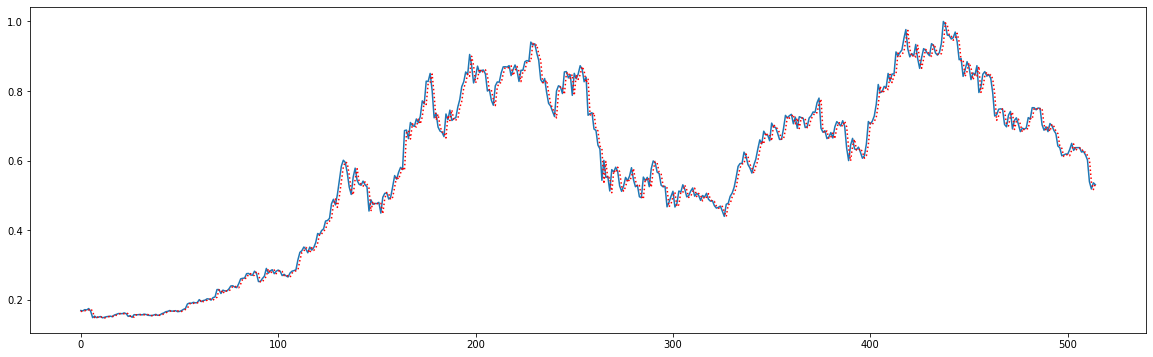

In [356]:
plt.figure(figsize=(20, 6))
plt.plot(y_valid)
plt.plot(y_pred, color='red', linestyle=":")

In [357]:
mean_squared_error(y_valid, y_pred)

0.0006234405394551867

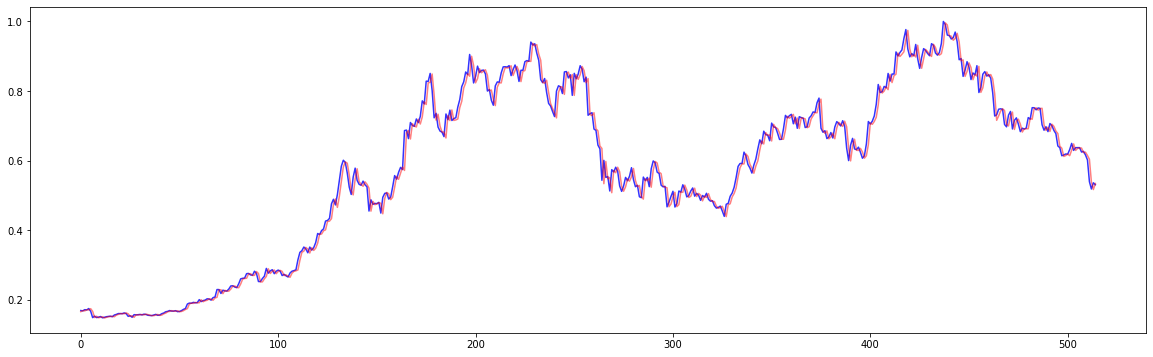

In [358]:
plt.figure(figsize=(20, 6))
plt.plot(pd.Series(y_valid), alpha=0.8, color='b')
plt.plot(pd.Series(LR.predict(x_valid)), alpha=0.5, color='r')
plt.show()
